<a href="https://colab.research.google.com/github/hugosdef/APRENDIZAJE_AUTOMATICO_23_24/blob/main/Pr%C3%A1ctica1_AP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Práctica 1**
### Grupo 5
**Autores:**
- Hugo Santos de Felipe
- David Marín Sala
- Álvaro García Hernández



# **Introducción**

Esta memoria aborda el procesamiento y clasificación de imágenes mediante técnicas de aprendizaje profundo, específicamente utilizando redes neuronales artificiales (RNA). Centramos nuestro estudio en el conjunto de datos Fashion-MNIST, una colección de 70,000 imágenes en escala de grises que representan diez categorías distintas de prendas de vestir.

 Con este proyecto se pretende desarrollar y evaluar modelos de RNA, ajustando variables como la cantidad de neuronas, funciones de activación y optimizadores, para poder identificar y clasificar dichas imágenes. A lo largo del documento, se presentan análisis detallados del desempeño de cada modelo, visualizaciones de sus predicciones y un enfoque riguroso para entender sus comportamientos y capacidades. Concluimos con una propuesta de mejora para uno de los modelos, incorporando un optimizador y función de pérdida específicos, y discutiremos las razones detrás de estas elecciones y su impacto en el rendimiento.

# **Objetivos**

Esta investigación tiene como objetivo principal proporcionar una explicación a nivel teórico-práctico del proceso de creación y evaluación de modelos de aprendizaje profundo. Para el desarrollo del mismo , nos hemos apoyado del lenguaje de programación Python.

A nivel de implementación nos centramos en destacar las consideraciones clave en la selección de arquitecturas de redes neuronales artificiales (RNA) y la optimización de hiperparámetros, abordando específicamente el desafío de clasificar imágenes en el conjunto de datos Fashion-MNIST.

Nuestro propósito es explorar las complejidades involucradas en la construcción de modelos de aprendizaje profundo para la clasificación de imágenes, comprendiendo cómo las elecciones de arquitectura, funciones de activación y optimizadores afectan el rendimiento de estos modelos.




###**Código**

Para empezar, importaremos todas las librerías que vamos a utilizar, que son los primeros pasos para poder trabajar con nuestro conjunto de datos.



In [ ]:
# Importamos todas las librerías que vamos a requerir.
import tensorflow as tf
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense
from tensorflow.keras.utils import to_categorical
import numpy as np
import matplotlib.pyplot as plt
print(tf.__version__) # Para asegurarnos de estar usando una versión 2.0.0 (o superior) de TensorFlow.

2.13.0


Este fragmento de código tiene como objetivo cargar los datos del conjunto Fashion-MNIST y realizar la normalización de las imágenes, lo que escala los valores de píxeles al rango [0, 1].
Además, se verifica si los datos tienen la forma esperada y se imprimen las dimensiones de los conjuntos de entrenamiento y prueba.


In [ ]:
# Cargamos los datos de Fashion-MNIST y normalizamos las imágenes.
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()
train_images = train_images / 255
test_images = test_images / 255

# Verificamos si los datos tienen la forma esperada:
print("\n\nShape de train_images:", train_images.shape)
# Debería tener la forma (60000, 28, 28) , conjunto de entrenamiento de 60,000 imágenes de 28x28 píxeles cada una.

print("Shape de train_labels:", train_labels.shape)
# Debería tener la forma (60000,) , las etiquetas de clase para el conjunto de entrenamiento.

print("Shape de test_images:", test_images.shape)
# Debería tener la forma (10000, 28, 28),  conjunto de prueba estándar de 10,000 imágenes de 28x28 píxeles cada una.

print("Shape de test_labels:", test_labels.shape)
# Debería tener la forma (10000,) que contiene las etiquetas de clase para el conjunto de prueba.



Shape de train_images: (60000, 28, 28)
Shape de train_labels: (60000,)
Shape de test_images: (10000, 28, 28)
Shape de test_labels: (10000,)



**Funciones Definidas:**
1. **`get_class_name(index)`**: Esta función devuelve el nombre de la clase correspondiente a un índice dado.

2. **`crear_entrenar(neuronas, activacion, optimizador, epocas)`**: Esta función crea y entrena una RNA con configuraciones específicas, como número de neuronas, función de activación y optimizador. También muestra un resumen del modelo y devuelve el modelo y los resultados del entrenamiento. Cabe destacar que en esta función usamos a la hora de entrenar el modelo un batch size de 50 lo que hace que aumente nuestra precisión ya que entrenamos con paquetes más pequeños de imágenes y , aunque se produce un sobreentrenamiento en algún caso, merece la pena ya que la precisión en el conjunto de prueba resultante es mayor. Además, usamos la función **keras.layers.Flatten()** que es una capa de preprocesamiento en Keras que se utiliza comúnmente al construir modelos de redes neuronales. Su función principal es transformar los datos de entrada en un formato adecuado (aplanado (unidimensional)) para ser procesado por capas posteriores, especialmente cuando se trabaja con datos de imagen o matrices multidimensionales.

3. **`evaluar_con_datos_prueba(modelo)`**: Esta función evalúa el modelo con el conjunto de datos de prueba y muestra la pérdida y precisión obtenidas.

4. **`predicciones(predictions, numeroimagen)`**: Esta función muestra las probabilidades de pertenecer a cada clase para una imagen dada y su clase estimada.

5. **`plot_value_array(predictions, numeroimagen, test_labels)`**: Esta función visualiza las probabilidades predichas para cada clase y resalta la clase real de una imagen.

6. **`plot_image(numeroimagen, predictions, test_labels, test_images)`:** Esta función muestra una imagen junto con sus predicciones y etiquetas reales.

7. **`mejora_caso_3(neuronas, activacion, optimizador, epocas)`**: Esta función realiza una mejora del modelo de la RNA 3, utilizando una configuración específica, que incluye la función de pérdida 'sparse_categorical_crossentropy'.





In [ ]:
# Función para obtener el nombre de la clase (la prenda que es) a partir de un  índice.
def get_class_name(index):
    clases = [
        "Camiseta/top",
        "Pantalón",
        "Sudadera",
        "Vestido",
        "Abrigo",
        "Sandalia",
        "Camisa",
        "Zapatilla deportiva",
        "Bolso",
        "Bota de tobillo"
    ]
    return clases[index]

# Función para crear y entrenar la RNA
def crear_entrenar(neuronas, activacion, optimizador, epocas):

    # Imprimimos la configuración utilizada
    print(f"\nConfiguración empleada --> Neuronas: {neuronas}, Función de Activación: {activacion}, Optimizador: {optimizador}\n")

    # Creamos un modelo secuencial
    modelo = Sequential()

    # Agregamos una capa de aplanamiento de entrada (Flatten)
    # La capa Flatten() convierte cada imagen de 28x28 en un vector
    # unidimensional de 784 elementos (28x28 = 784). Esto es necesario
    # porque las capas Dense (totalmente conectadas) de una red neuronal
    # requieren datos de entrada unidimensionales.
    modelo.add(Flatten(input_shape=(28, 28)))

    modelo.add(Dense(neuronas, activation=activacion))

    # Agregamos una capa de salida con activación softmax para la clasificación de 10 clases.
    modelo.add(Dense(10, activation='softmax'))

    modelo.summary() # Con esta función tendremos un resumen del modelo

    # Compilamos el modelo con el optimizador y la función de pérdida especificados
    modelo.compile(optimizer=optimizador, loss='categorical_crossentropy', metrics=['accuracy'])

    train_labels_oh = to_categorical(train_labels, 10) # Para pasar etiquetas de entrenamiento a codificación one-hot

    entrenamiento = modelo.fit(train_images, train_labels_oh, epochs=epocas, batch_size=50)
    return modelo, entrenamiento


def mejora_caso_3(neuronas, activacion, optimizador, epocas):

    print(f"\nConfiguración empleada --> Neuronas: {neuronas}, Función de Activación: {activacion}, Optimizador: {optimizador}\n")
    modelo = Sequential()
    modelo.add(Flatten(input_shape=(28, 28)))
    modelo.add(Dense(neuronas, activation=activacion))
    modelo.add(Dense(10, activation='softmax'))
    modelo.summary()
    modelo.compile(optimizer=optimizador, loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    entrenamiento = modelo.fit(train_images, train_labels, epochs=epocas, batch_size=50)
    print("\nEVALUACIÓN DE ESTE CASO CON EL CONJUNTO DE DATOS PRUEBA.\n")
    test_loss, test_acc = modelo.evaluate(test_images, test_labels)
    print("Resultados en el conjunto de prueba:")
    print(f'Pérdida en el conjunto de prueba: {test_loss}')
    print(f'Precisión en el conjunto de prueba: {test_acc}')
    return modelo, entrenamiento


# Función para evaluar con datos de prueba
def evaluar_con_datos_prueba(modelo):

    print("\nEVALUACIÓN DE ESTE CASO CON EL CONJUNTO DE DATOS PRUEBA.\n")
     # Para pasar etiquetas de test a codificación one-hot.
    test_labels_oh = to_categorical(test_labels, 10)

    # Evaluamos el modelo utilizando los datos de prueba (test_images) y las etiquetas de prueba codificadas en one-hot (test_labels_oh).
    test_loss, test_acc = modelo.evaluate(test_images, test_labels_oh)

    # Imprimimos por pantalla:
    print("Resultados en el conjunto de prueba:")
    print(f'Pérdida en el conjunto de prueba: {test_loss*100}%')
    print(f'Precisión en el conjunto de prueba: {test_acc*100}%')

# Función para realizar predicciones
def predicciones(predictions, numeroimagen):

    # Imprimimos una lista con las probabilidades de que una imagen sea una de las 10 clases.
    # La suma de estas ha de ser uno , lo que ya se comprobó.
    # print(predictions[numeroimagen].shape)
    # print(np.sum(predictions[numeroimagen]))
    print("\nLA LISTA DE PROBABILIDADES DE SER CADA ELEMENTO ES:")
    print(predictions[numeroimagen])
    # La variable indice_prediccion es la probabilidad más alta de la lista.
    indice_prediccion = np.argmax(predictions[numeroimagen])
    # Llamamos a la funcion get_class_name para que a partir del indice nos diga que prenda es.
    clase_prediccion = get_class_name(indice_prediccion)
    print(f"\nESTE MODELO ESTIMA QUE LA IMAGEN {numeroimagen+1} CORRESPONDE AL ELEMENTO Nº {indice_prediccion}: {clase_prediccion}")


# Función para visualizar y resaltar predicciones en un gráfico de barras.
def plot_value_array(predictions, numeroimagen, test_labels):

    prediction, test_label = predictions[numeroimagen], test_labels[numeroimagen]

    # Configuramos el gráfico
    plt.grid(False)
    plt.xticks(range(10))

    # Creamos el gráfico de barras con las predicciones
    thisplot = plt.bar(range(10), prediction, color='#777777')

    # Establecemos el rango del eje y de 0 a 1
    plt.ylim([0, 1])

    # Marcamos la etiqueta predicha en rojo
    predicted_label = np.argmax(prediction)
    thisplot[predicted_label].set_color('red')

    # Marcamos la etiqueta real en azul
    thisplot[test_label].set_color('blue')


def plot_image(numeroimagen, predictions, test_labels, test_images):

    prediction, test_label, test_image = predictions[numeroimagen], test_labels[numeroimagen], test_images[numeroimagen]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])

    # Mostramos la imagen de test.
    plt.imshow(test_image, cmap=plt.cm.binary)

    indice_prediccion = np.argmax(prediction)
    clase_prediccion = get_class_name(indice_prediccion)

    clase_testlabel = get_class_name(test_label)

    # Comprobamos si la predicción es correcta y establecemos el color de la etiqueta en consecuencia.
    if indice_prediccion == test_label:
      color = 'blue' # Si la predicción es correcta, la etiqueta se mostrará en azul.
    else:
      color = 'red' # Si la predicción es incorrecta, la etiqueta se mostrará en rojo.

    # Mostramos información de la predicción en la etiqueta
    plt.xlabel(" {} {:2.0f}% ({})".format(clase_prediccion,
                                         100*np.max(prediction),
                                         clase_testlabel),
                                         color=color)




A continuación , mostraremos cada clase con la que vamos a trabajar, es decir , los tipos de prendas de ropa que se encuentran en el conjunto de datos. Además mostraremos una imagen de cada una.

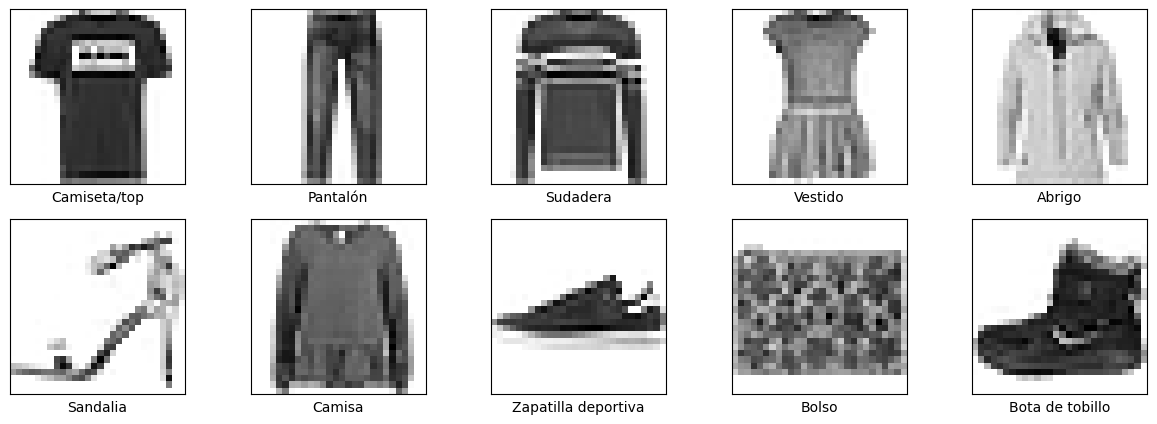

In [ ]:
# Creamos una figura para mostrar las clases y una imagen de cada clase
plt.figure(figsize=(15, 5))
for i in range(10):
    plt.subplot(2, 5, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    # Buscamos la primera imagen de la clase i en los datos de entrenamiento
    index = (train_labels == i).nonzero()[0][0]
    plt.imshow(train_images[index], cmap=plt.cm.binary)
    name = get_class_name(i)
    plt.xlabel(name)

# Mostramos la figura
plt.show()



Mostramos a continuación dos variables que consisten en una lista de tuplas llamada "opciones" y "opciones2".

Cada tupla representa una configuración única para entrenar un modelo de red neuronal.

La tupla tiene cuatro elementos, que se organizan de la siguiente manera:

1. Número de neuronas en la primera capa oculta.

2. Función de activación utilizada en la primera capa oculta.
3. Optimizador utilizado para el entrenamiento del modelo.
4.Número de épocas de entrenamiento.

In [ ]:
# Definimos todas las posibles combinaciones de entradas para la RNA

# Los ochos casos con sus respectivas configuraciones.
opciones = [(10, 'relu', 'sgd', 5),
    (10, 'relu', 'rmsprop', 5),
    (10, 'sigmoid', 'sgd', 5),
    (10, 'sigmoid', 'rmsprop', 5),
    (512, 'relu', 'sgd', 5),
    (512, 'relu', 'rmsprop', 5),
    (512, 'sigmoid', 'sgd', 5),
    (512, 'sigmoid', 'rmsprop', 5),
     ]

# Modificación de los casos 2 y 7 utilizando 25 épocas.
opciones2 = [
    (10, 'relu', 'rmsprop', 25),
    (512, 'sigmoid', 'sgd', 25)
]




El bucle for que llama a las funciones tiene como objetivo ejecutar una serie de configuraciones de modelos de redes neuronales y realizar una serie de análisis y evaluaciones en cada iteración. Este bucle itera a través de las configuraciones almacenadas en la lista opciones y realiza las siguientes tareas:

1. Imprime un encabezado que indica el cambio de modelo y el número de caso en el que se encuentra.
2. Llama a la función crear_entrenar para crear y entrenar un modelo de red neuronal utilizando cada configuración.
3.Llama a la función evaluar_con_datos_prueba para evaluar el modelo en el conjunto de datos de prueba.
4. Realiza predicciones utilizando el modelo en una imagen específica del conjunto de prueba (en este caso, la 6ª imagen).
5. Muestra visualmente las predicciones y probabilidades de cada clase para la imagen en cuestión.
6. Realiza un bucle adicional para mostrar las predicciones y probabilidades de las 10 primeras imágenes del conjunto de prueba y diferentes gráficas representativas.


Los ejercicios se irán explicando a medida que el código avance y se muestren los resultados correspondientes a cada configuración de modelo. Esto permite analizar y comparar los resultados de cada caso de manera ordenada y comprender cómo diferentes parámetros afectan el rendimiento de la red neuronal en la tarea de clasificación de prendas de vestir.

In [ ]:
j = 1 # Para indicar el caso en el que estamos.

for i , o in enumerate(opciones):
    print("\n\n=======================================================================")
    print(f"================== CAMBIO DE MODELO AL CASO Nº{j} =======================")
    print("=======================================================================")
    j = j + 1 # Solo para indicar el caso en el que estamos.
    neuronas, activacion, optimizador, epocas = o
    modelo, entrenamiento = crear_entrenar(neuronas, activacion, optimizador, epocas)
    evaluar_con_datos_prueba(modelo)

    print("\nCON ESTE MODELO, REALIZAMOS PREDICCIONES SOBRE LA 6ª IMAGEN DEL TEST")
    predictions = modelo.predict(test_images)
    predicciones(predictions, 5)
    for k in range(0, 10):
      print("\n\n=================================================================")
      print(f"========================== IMAGEN Nº{k+1} ===========================")
      predicciones(predictions, k)
      plt.figure(figsize=(6,3))
      plt.subplot(1,2,1)
      plot_image(k, predictions, test_labels, test_images)
      #plot_image(k, test_labels, test_images)
      plt.subplot(1,2,2)
      plot_value_array(predictions, k, test_labels)
      #plot_value_array (k, test_labels)
      plt.show()


**Configuración y Entrenamiento de Modelos de Redes Neuronales**

En este primer ejercicio, hemos tratado de llevar a cabo una serie de procesos para configurar y entrenar diferentes modelos de redes neuronales utilizando el conjunto de datos ya mencionado.

El objetivo principal es entender como diferentes configuraciones de modelos afectan el rendimiento de la RNA principalmente en términos de precisión.

Para esta investigación, hemos definido ocho configuraciones de modelos distintas, y nuestro enfoque inicial ha sido la creación y entrenamiento de estos modelos utilizando la función crear_entrenar(neuronas, activación, optimizador, épocas). Vamos a explicar estos términos antes de continuar:

**Neuronas**: En una red neuronal, las neuronas son unidades fundamentales que procesan la información. El número de neuronas en la capa oculta determina la capacidad de la red para aprender patrones complejos en los datos. Más neuronas pueden ayudar a la red a capturar relaciones más sutiles, pero también aumentan el riesgo de sobreajuste.

**Función de Activación**: La función de activación se aplica a la salida de cada neurona y determina si la neurona debe activarse o no.
En este estudio, utilizamos dos funciones principales: **ReLU** y **Sigmoid**.
1. **La función ReLU (Rectified Linear Unit)** es una función de activación comúnmente utilizada en redes neuronales. Su característica principal es que, para cualquier valor de entrada positivo, devuelve el mismo valor, y para cualquier valor de entrada negativo, devuelve cero. En otras palabras, ReLU activa (permite el flujo de información) para valores positivos y desactiva (bloquea el flujo de información) para valores negativos. Esta simplicidad y no linealidad la hacen efectiva en la mayoría de las aplicaciones de redes neuronales, ya que ayuda a superar problemas de desvanecimiento del gradiente y permite que la red aprenda de manera eficiente.
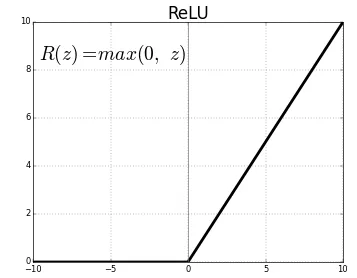
2. **La función Sigmoid**, produce valores de salida en un rango entre cero y uno, lo que la hace adecuada para interpretarse como probabilidades. Cuando se evalúa con valores de entrada negativos, la función se acerca a cero, en cero, la salida es 0.5, y para valores positivos, se acerca a uno. Por lo general, se utiliza en la capa de salida de una red neuronal para clasificar datos en dos categorías. Sin embargo, la función sigmoide ha perdido popularidad en la actualidad debido a que no está centrada, lo que puede afectar el proceso de entrenamiento de la neurona y contribuir al problema del desvanecimiento del gradiente.

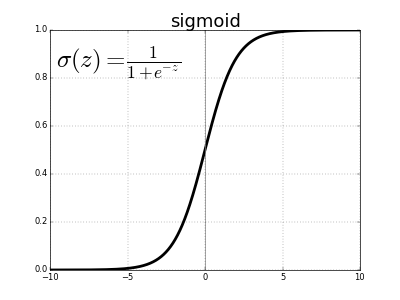


**Optimizador:** El optimizador es un algoritmo que ajusta los pesos de las neuronas durante el entrenamiento para minimizar la función de pérdida. En este estudio, utilizamos dos optimizadores importantes: SGD (Stochastic Gradient Descent) y RMSprop.
1. **SGD (Stochastic Gradient Descent)**: simplifica el proceso de cálculo de actualizaciones de parámetros al considerar solo una muestra de datos a la vez. Aunque produce derivadas parciales que no son óptimas en términos de dirección de descenso en la función de error, compensa esta desventaja con la frecuencia de actualizaciones de parámetros, lo que resulta en tiempos de entrenamiento más cortos y puede ayudar al algoritmo a escapar de mínimos locales en la función de error.
2. **RMSprop**: Su función principal es adaptar de manera individual la tasa de aprendizaje de cada parámetro del modelo. Lo logra manteniendo un promedio móvil de las raíces cuadradas de los gradientes anteriores. Esto permite a los parámetros con gradientes grandes tener tasas de aprendizaje más pequeñas y a los parámetros con gradientes pequeños tener tasas de aprendizaje más grandes, lo que mejora la convergencia y la estabilidad del entrenamiento. RMSprop es efectivo para tratar problemas de convergencia en algoritmos de descenso de gradiente estocástico (SGD) y es útil en problemas con diferentes escalas de gradientes.

**Épocas:** Las épocas representan la cantidad de veces que el conjunto de datos completo se pasa a través de la red durante el proceso de entrenamiento. Más épocas pueden permitir que la red converja y mejore su precisión, pero también aumentan el tiempo de entrenamiento. A nivel de complejidad, hay que encontrar ese punto óptimo de las épocas para encontrar un programa con buena precisión pero que no lleve consigo un gasto excesivo a nivel de complejidad.  


Una vez tenemos los datos de cada modelo podemos sacar conclusiones de cada configuración.

**Modelo 1: 10 Neuronas, ReLU, SGD, 5 Épocas**

- Este primer modelo es relativamente sencillo, con 10 neuronas en la capa oculta y la función de activación ReLU. Esperamos una precisión moderada en el conjunto de prueba debido a la simplicidad de la arquitectura.

**Modelo 2: 10 Neuronas, ReLU, RMSprop, 5 Épocas**

- El Modelo 2 es similar al primero, pero utiliza el optimizador RMSprop. Este optimizador puede mejorar la convergencia y, en consecuencia, la precisión.


**Modelo 3: 10 Neuronas, Sigmoid, SGD, 5 Épocas**

- En el tercer modelo, cambiamos la función de activación a Sigmoid. Sin embargo, la función Sigmoid puede ralentizar el entrenamiento y dificultar la convergencia, lo que puede afectar y afecta negativamente la precisión, siendo este el modelo menos preciso de todos.

**Modelo 4: 10 Neuronas, Sigmoid, RMSprop, 5 Épocas**

- El Modelo 4 es similar al Modelo 3, pero utiliza RMSprop como optimizador. Aunque RMSprop puede mejorar la convergencia, la función Sigmoid podría seguir limitando la precisión.

**Modelo 5: 512 Neuronas, ReLU, SGD, 5 Épocas**

- Al aumentar significativamente el número de neuronas en la capa oculta, este modelo tiene una mayor capacidad para aprender patrones complejos en los datos. Esto puede traducirse en una mayor precisión, pero también puede aumentar el riesgo de sobreajuste. El objetivo del analista es encontrar el punto óptimo entre el nivel de precicisión  y el gasto a nivel de complejidad

**Modelo 6: 512 Neuronas, ReLU, RMSprop, 5 Épocas**

- Similar al Modelo 5, pero con el optimizador RMSprop. La combinación de más neuronas y RMSprop lleva a una mayor precisión y una convergencia más rápida.

**Modelo 7: 512 Neuronas, Sigmoid, SGD, 5 Épocas**

-  Al igual que los Modelos 3 y 4, este modelo utiliza la función sigmoide, lo que podría limitar su precisión en comparación con los modelos que utilizan ReLU.

**Modelo 8: 512 Neuronas, Sigmoid, RMSprop, 5 Épocas**

- Similar al Modelo 7, pero con RMSprop como optimizador. Aunque el optimizador puede mejorar la convergencia, es posible que la función sigmoide aún tenga un impacto negativo en la precisión.

Como conclusión, la precisión de los modelos que entrenamos depende de tres cosas: cómo está hecha la red, qué función se usa para activarla y cómo se ajustan los valores de la red.

Algunos modelos, como el 5 y el 6, tienen más neuronas en su parte interna, lo que les ayuda a hacer un mejor trabajo al clasificar las prendas. Pero si los entrenamos con muchas épocas, pueden aprender tan bien los datos de entrenamiento que se confunden cuando ven nuevos datos, lo que se conoce como overfitting .

También, el tipo de función que usamos para activar la red importa. La función ReLU ayuda a que los modelos aprendan más rápido y mejor, mientras que la función sigmoide a veces dificulta el aprendizaje.

Así que, en resumen, es importante elegir cuidadosamente cómo construir la red y qué configuración usar para obtener un buen rendimiento sin que se confunda cuando se enfrenta a datos nuevos.

---

**Model.summary()**

Explicamos también la salida de cada model.summary() de nuestros diferentes casos.
Tenemos dos cantidades distintas de parámetros dependiendo de si son 10 o 512 neuronas en la capa 1.

En el caso de que haya 512 neuronas en la capa uno la operación para sacar el número total de parámetros es la siguiente:

784 (28*28 píxeles) * 512 neuronas + 512 (sesgo) = 401920.        
Después esas 512 neuronas * 10 + 10 (sesgo) = 5130.                            
Total = 401920 + 5130  = 407050.

En el caso de que haya 10 neuronas en la capa uno la operación para sacar el número total de parámetros es la siguiente:

784 * 10 + 10 = 7850.    
10 * 10 + 10 = 110.                                                               
Total = 7960.                                           

Además, explicamos los **ajustes** ( ajuste se refiere al proceso en el cual un modelo de red neuronal se entrena utilizando un conjunto de datos de entrenamiento para aprender a realizar una tarea de clasificación de imágenes de prendas de vestir. Ese ajuste se realiza en un cierto número de épocas ('epocas') y con batch_size para acelerar dicho proceso ) que hace nuestro modelo.
Los ajustes que hace nuestro modelo son:

60.000 : 128 ( batch_size ) * 5 ( nº de épocas ) = 2345.

---


**Evaluación de cada uno de los 8 modelos comparando el rendimiento del modelo en
el conjunto de datos de prueba.**

Para evaluar el desempeño de los 8 modelos que hemos desarrollado, hemos utilizado la función 'evaluar_con_datos_prueba(modelo)'. Esta función nos permite medir tanto la precisión como la pérdida de cada modelo al utilizar el conjunto de datos de prueba. Esta evaluación en el conjunto de prueba es crucial, ya que nos proporciona una medida objetiva de como de bien se comporta el modelo con datos no vistos previamente.

Es importante destacar que al comparar el rendimiento de los modelos en el conjunto de prueba, podemos encontrarnos con diferentes resultados en términos de precisión. Algunos modelos pueden mostrar una alta precisión en el conjunto de prueba, lo que sugiere que están haciendo buenas predicciones en datos no vistos. Sin embargo, también es posible que algunos modelos muestren una precisión más baja en el conjunto de prueba.

Esta disminución en la precisión puede deberse a varias razones, una de las cuales es el fenómeno del sobreentrenamiento. El sobreentrenamiento ocurre cuando un modelo se ajusta demasiado a los datos de entrenamiento, memorizando los mismos en lugar de aprender patrones generales. Como resultado, el modelo puede tener un alto rendimiento en los datos de entrenamiento, pero su precisión disminuye en datos de prueba.

---

**Predicciones sobre la 6ª imagen de test (test_images[5])**.

Para ello , hemos usado la funcion 'predicciones' , que ha impreso un vector con las probabilidades de que la prenda pertenezca a cada una de las 10 clases que tenemos en el conjunto de datos. De ese vector, hemos sacado el valor mas alto, que es la clase que el modelo estima que la prenda de ropa es.

Además, durante el proyecto, tambíen se comprobó que la suma de todas las probabilidades del vector sea 1, lo que nos ayudó a comprobar que estábamos realizando bien la función.

Es importante destacar que, aunque con distinta precisión, todos los modelos llegan a la misma conclusión cierta, que la imagen número 6 corresponde a la clase pantalón.

---

**Predicción, de las 10 primeras
imágenes del conjunto de test, para cada uno de los 8 casos.**


Después de evaluar y graficar las predicciones de las diez primeras imágenes con cada uno de los modelos, podemos reforzar algunas conclusiones y obtener más información sobre el rendimiento de estos modelos. Aquí hay algunas observaciones clave:

1. **Comparación de Rendimiento de los Modelos**: En el ejercicio 1, ya habíamos comparado el rendimiento de los diferentes modelos. Ahora, al analizar las predicciones en las imágenes de prueba, podemos confirmar esas conclusiones y ver cómo se comportan en situaciones reales. Es posible que algunos modelos funcionen mejor en ciertas categorías de prendas, lo que puede influir en la elección del modelo adecuado para tareas específicas.

2. **Dificultad en la Predicción de Prendas**: Es evidente que algunas prendas, como camisetas y pantalones, son más fáciles de predecir, ya que tienden a ser reconocidas con mayor precisión por la mayoría de los modelos. Esto puede deberse a que estas categorías de prendas tienen características distintivas que los modelos pueden identificar de manera más efectiva.

3. **Clasificar Sandalias**: Por otro lado, se observa que las sandalias son prendas difíciles de predecir para los modelos. Esto podría indicar que las sandalias tienen características menos distintivas o que su variabilidad es mayor, lo que dificulta su clasificación precisa.


---

**A continuación, analizamos e interpretamos los resultados del caso 2 y el 7 frente a sus originales tras haber multiplicado por 5 las épocas de entrenamiento (25)**.



In [ ]:
j = 2
for i, o in enumerate(opciones2):
    print("\n\n=======================================================================")
    print(f"==================== VARIACIÓN MODELO CASO Nº{j} ========================")
    print("=======================================================================")
    neuronas, activacion, optimizador, epocas = o
    modelo, entrenamiento = crear_entrenar(neuronas, activacion, optimizador, epocas)
    evaluar_con_datos_prueba(modelo)
    j = j + 5




Aumentar el número de épocas de entrenamiento ha llevado a una mejora en la capacidad del modelo para hacer predicciones. Esto se refleja en la disminución de la pérdida y el aumento de la precisión tanto en el conjunto de entrenamiento como en el de prueba. Sin embargo, es importante tener en cuenta que un entrenamiento excesivamente largo puede llevar a un sobreajuste del modelo en los datos de entrenamiento, lo que significa que el modelo podría tener un rendimiento deficiente en datos no vistos. Por lo tanto, encontrar un equilibrio en el número de épocas es esencial en el entrenamiento de redes neuronales.

---

In [ ]:
print("\n\n=======================================================================")
print("==================== MEJORA MODELO CASO Nº 3 ==========================")
print("=======================================================================")
mejora_caso_3(10, 'sigmoid', 'adam', 5)


---
***CONCLUSIONES Y APRENDIZAJES***

La elección de la configuración del modelo, incluyendo el número de neuronas, la función de activación y el optimizador, afecta significativamente el rendimiento de las redes neuronales.

La función de activación ReLU tiende a ofrecer un mejor rendimiento en términos de velocidad de convergencia y precisión en comparación con la función Sigmoid.

Los optimizadores, como RMSprop, pueden mejorar la convergencia y el rendimiento, dependiendo de la configuración del modelo.

La complejidad del modelo, con un mayor número de neuronas, puede aumentar la precisión, pero es importante evitar el sobreajuste.

Es crucial encontrar un equilibrio adecuado entre precisión y generalización en las configuraciones más complejas, caracterizadas por un mayor número de neuronas en la capa oculta. Si bien estas configuraciones pueden lograr una alta precisión en los datos de entrenamiento, es esencial evitar el riesgo de sobreajuste, donde el modelo se adapta en exceso a esos datos y no generaliza de manera efectiva a nuevas situaciones.